In [15]:
#from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255 # Normalise data to [0, 1] range
x_test /= 255  # Normalise data to [0, 1] range
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [18]:
image = x_train[530].reshape([28,28])
print("label :", y_train[530])

label : 2


In [3]:
import matplotlib.pyplot as plt

In [4]:
plt.imshow(image)

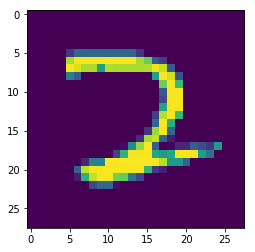

In [5]:
plt.show()

In [19]:
#Convert 1-dimensional class arrays to 10-dimensional class matrices-> one-hot vector 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
#model.add(Conv2D(32, kernel_size=(3, 3),
#                 activation='relu',
#                 input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
#model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.summary()

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=1,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total para

In [30]:
prediction = model.predict(x_test)
prediction_class = model.predict_classes(x_test)
#print (i for i in range prediction)

 9984/10000 [============================>.] - ETA: 0s

(10000, 28, 28, 1)


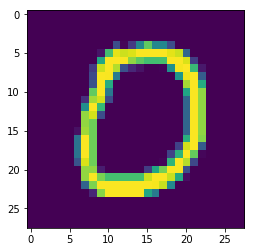

[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[  9.94852364e-01   1.34329766e-05   2.23163422e-03   4.31171138e-05
   5.36763082e-06   1.38971407e-03   2.27853845e-04   9.43521354e-06
   1.22096378e-03   6.27649797e-06]
0


In [36]:
print (x_test.shape)
plt.imshow(x_test[10].reshape(28,28))
plt.show()
print (y_test[10])
print (prediction[10])
print (prediction_class[10])